# Logistic Model (Citarum Water)
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Citarum dataset and display the first few rows

In [2]:
dataset = pd.read_csv('CitarumWater.csv')
print(dataset.head())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


## Feature selection

In [3]:
# Hapus kolom yang tidak diperlukan dan tentukan Class sebagai target
columns_to_drop = ["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2", "Class"]
X = dataset.drop(columns=columns_to_drop)  # Features
y = dataset["Class"]   # Target

## Balancing imbalanced data

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

- SMOTE (Synthetic Minority Over-sampling Technique) merupakan teknik meng-generate sample untuk class yang minoritas.

## Splitting the dataset into the Training set and Test set (70:30)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

## Predicting the Test set results

In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

## Making the Confusion Matrix and print the classification report

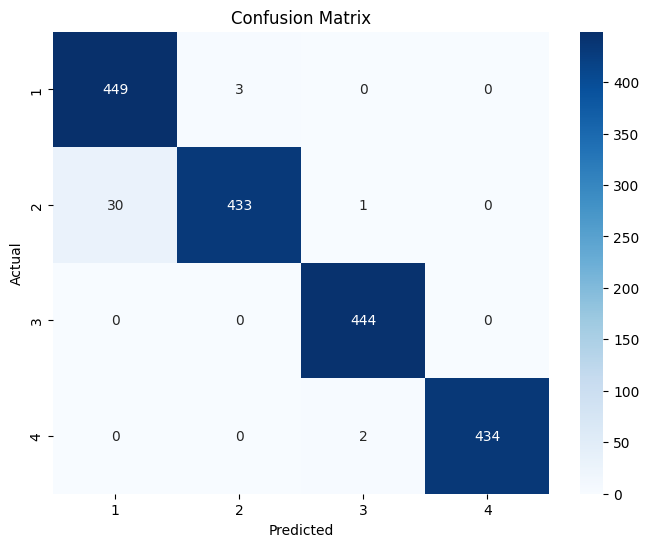

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       452
           2       0.99      0.93      0.96       464
           3       0.99      1.00      1.00       444
           4       1.00      1.00      1.00       436

    accuracy                           0.98      1796
   macro avg       0.98      0.98      0.98      1796
weighted avg       0.98      0.98      0.98      1796

Accuracy :  0.9799554565701559
Precision :  0.9808009446783066
F1 Squared :  0.9799289423655153
AUC :  0.9978198498064798
Recall :  0.9799554565701559


In [15]:
# Evaluasi model dan tampilkan hasilnya
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
#print(f"\nAccuracy: {accuracy * 100:.2f}%")
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('F1 Squared : ',f1)
print('AUC : ',auc)
print('Recall : ',recall)

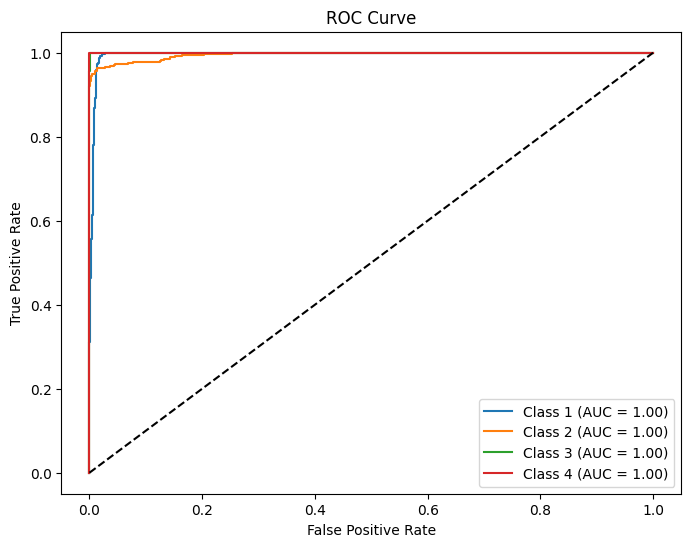

In [16]:
# Gambarkan kurva ROC
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in np.unique(y):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i-1])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_prob[:, i-1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Accuracy
Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} ]

Di mana:

*   TP (True Positive): Prediksi positif yang benar.
*   TN (True Negative): Prediksi negatif yang benar.
*   FP (False Positive): Prediksi positif yang salah.
*   FN (False Negative): Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.

## Precision
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:

[ Precision = \frac{TP}{TP + FP} ]

Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.

## Recall
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:

[ Recall = \frac{TP}{TP + FN} ]

Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.

## F1-Score
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:

[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} ]

F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.

## AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

*   True Positive Rate (TPR) atau Recall: ( TPR = \frac{TP}{TP + FN} )
*   False Positive Rate (FPR): ( FPR = \frac{FP}{FP + TN} )

AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.